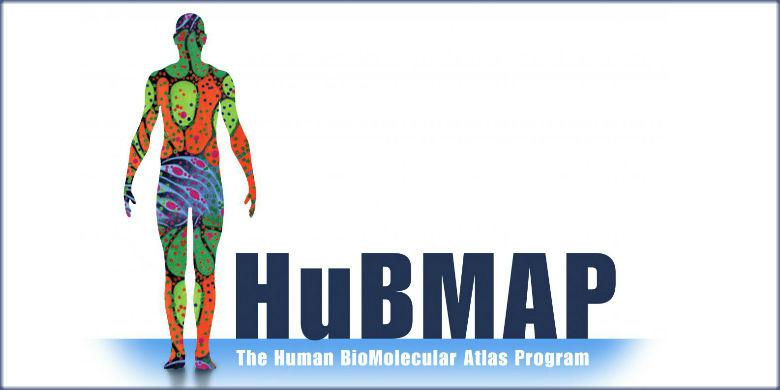

This competition, “**Hacking the Kidney**," starts by mapping the human kidney at single cell resolution.

Your challenge is to detect functional tissue units (FTUs) across different tissue preparation pipelines. An FTU is defined as a “three-dimensional block of cells centered around a capillary, such that each cell in this block is within diffusion distance from any other cell in the same block” (de Bono, 2013). The goal of this competition is the implementation of a successful and robust glomeruli **FTU detector**.

## Libraries

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import tifffile
import os
import shapely.geometry as sg
import shapely.ops as so
import json

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
TRAIN_PATH = '/kaggle/input/hubmap-kidney-segmentation/train/'
sorted(os.listdir(TRAIN_PATH))

In [ ]:
TEST_PATH = '/kaggle/input/hubmap-kidney-segmentation/test/'
os.listdir(TEST_PATH)

There are 8 Train images and 5 Test images.

In [ ]:
hubmap = pd.read_csv('/kaggle/input/hubmap-kidney-segmentation/HuBMAP-20-dataset_information.csv')
hubmap.shape

In [ ]:
hubmap #2f6ecfcdf

### Number of patients

In [ ]:
hubmap.image_file.nunique()

In [ ]:
df = hubmap.groupby('race')['race'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='race', title='Patient Race Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby('sex')['sex'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='sex', title='Patient Gender Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby('age')['age'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='age', y='counts', color = 'age')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

There is average distribution from 30 to 75. Also high number of patients in the range of 50 to 60

In [ ]:
df = hubmap.groupby('laterality')['laterality'].count().reset_index(name = 'counts')
fig = px.pie(df, values='counts', names='laterality', title='Patient Laterality Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby('percent_cortex')['percent_cortex'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='percent_cortex', y='counts', color = 'percent_cortex')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby('bmi_kg/m^2')['bmi_kg/m^2'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='bmi_kg/m^2', y='counts', color = 'bmi_kg/m^2')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby('weight_kilograms')['weight_kilograms'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='weight_kilograms', y='counts', color = 'weight_kilograms')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby('height_centimeters')['height_centimeters'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='height_centimeters', y='counts', color = 'height_centimeters')
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby(['sex','race'])['race'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='sex', y='counts', color = 'race', barmode="group")
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap.groupby(['sex','laterality'])['laterality'].count().reset_index(name = 'counts')
df = df.sort_values(by  = 'counts', ascending = False)
fig = px.bar(df, x='sex', y='counts', color = 'laterality', barmode="group")
fig.update_layout(
    autosize=False,
    width=950,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

### Sample Cell image

Thanks to @ihelon

In [ ]:
im = tifffile.imread("/kaggle/input/hubmap-kidney-segmentation/train/0486052bb.tiff")
plt.figure(figsize=(16, 16))
plt.imshow(im)
plt.axis("off");

In [ ]:
TRAIN_PATH = '/kaggle/input/hubmap-kidney-segmentation/train/'
sorted(os.listdir(TRAIN_PATH))

In [ ]:
with open(TRAIN_PATH+'0486052bb-anatomical-structure.json') as f:
    data = json.load(f)

r1 = sg.Polygon([tuple(i) for i in data[0]['geometry']['coordinates'][0]])
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

In [ ]:
with open(TRAIN_PATH+'095bf7a1f-anatomical-structure.json') as f:
    data = json.load(f)

r1 = sg.Polygon([tuple(i) for i in data[0]['geometry']['coordinates'][0]])
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

In [ ]:
with open(TRAIN_PATH+'1e2425f28-anatomical-structure.json') as f:
    data = json.load(f)

r1 = sg.Polygon([tuple(i) for i in data[0]['geometry']['coordinates'][0]])
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

In [ ]:
with open(TRAIN_PATH+'0486052bb.json') as f:
    data = json.load(f)
r1 = sg.Polygon([tuple(i) for i in data[0]['geometry']['coordinates'][0]])
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

In [ ]:
with open(TRAIN_PATH+'1e2425f28.json') as f:
    data = json.load(f)

r1 = sg.Polygon([tuple(i) for i in data[0]['geometry']['coordinates'][0]])
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

In [ ]:
with open(TRAIN_PATH+'095bf7a1f.json') as f:
    data = json.load(f)
r1 = sg.Polygon([tuple(i) for i in data[0]['geometry']['coordinates'][0]])
r2 = sg.box(0.5,0.5,1.5,1.5)
r3 = sg.box(4,4,5,5)

new_shape = so.cascaded_union([r1, r2, r3])
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in new_shape.geoms:    
    xs, ys = geom.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()

In [ ]:
TRAIN_PATH = '/kaggle/input/hubmap-kidney-segmentation/train/'
import glob, os
from skimage import io
os.chdir(TRAIN_PATH)
for file in glob.glob("*.tiff"):
    im = io.imread(TRAIN_PATH+file)
    print(file)
    print(im.shape)

In [ ]:
train = pd.read_csv('/kaggle/input/hubmap-kidney-segmentation/train.csv')
train.head()

In [ ]:
rlestr1 = train[train['id']=='2f6ecfcdf']['encoding'][0]
rlestr2 = train[train['id']=='aaa6a05cc']['encoding'][1]

In [ ]:
import numpy as np # linear algebra

def rleToMask(rleString,height,width):
    rows,cols = height,width
    rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
    rlePairs = np.array(rleNumbers).reshape(-1,2)
    img = np.zeros(rows*cols,dtype=np.uint8)
    for index,length in rlePairs:
        index -= 1
        img[index:index+length] = 255
    img = img.reshape(cols,rows)
    img = img.T
    return img

In [ ]:
img = rleToMask(rlestr1, 31278, 25794)
plt.imshow(img)

In [ ]:
img = rleToMask(rlestr2, 18000, 13000)
plt.imshow(img)

If you <font color = 'orange'>like</font> this kernel and want to <font color = 'orange'>fork</font> plz <font color = 'red'><b>UPVOTE.</b></font>

If you have suggestions to improve this kernel plz <font color = 'red'>COMMENT.</font>

<font color = 'Orange'><b>************************ Notebook is under construction ************************</b></font>